# Import

In [2]:
# Importaciones necesarias
!pip  install seaborn
!pip install pytorch-lightning
!pip install plotly

import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import json
import re
import matplotlib.pyplot as plt
import matplotlib
import torch
import pytorch_lightning as pl
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from torch.nn import Module, Linear
from torch.nn.functional import sigmoid, binary_cross_entropy
from torch.optim import Adam, Optimizer
from torch.utils.data import Dataset, DataLoader
from typing import Tuple
from numpy.typing import ArrayLike
from numpy import nan
from numpy.random import randn
from numpy import percentile
from numpy import asarray
from statistics import mode
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [3]:
!pip install nltk
!pip install plotly
!pip install unidecode

In [4]:
import re, nltk
import torch
import joblib
import pandas as pd
import numpy as np
import plotly.express as px
from numpy.typing import ArrayLike
from torch import Tensor
from typing import Tuple, List, Callable
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from torch.nn import Module, Linear, Dropout, Sequential
from torch.nn.functional import cross_entropy, relu
from torch.optim import Adam, Optimizer
from torch.utils.data import Dataset, DataLoader, random_split
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
from unidecode import unidecode

# Carga de Datos

In [5]:
df = pd.read_csv("Data_completa_enrriquecida.csv")  
df_audio_1 = pd.read_csv("features_extracted.csv")
df_audio_2 = pd.read_csv("features_extracted_original.csv")
df_audio_3 = pd.read_csv("features_extracted_final.csv")
df_audio_4 = pd.read_csv("features_extracted_final_second.csv")
df_audio_5 = pd.read_csv("features_extracted_final_third.csv")
df_audio_6 = pd.read_csv("features_extracted_lastTrue.csv")
df_audio_7 = pd.read_csv("features_extracted_lastTrue2.csv")
df_audio_features = pd.concat([df_audio_1,df_audio_2,df_audio_3,df_audio_4,df_audio_5,df_audio_6,df_audio_7],ignore_index = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24966 entries, 0 to 24965
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Letra                   24966 non-null  object 
 1   Idioma                  24848 non-null  object 
 2   lyrics_state            24966 non-null  object 
 3   hasLetra                24966 non-null  float64
 4   Lyrics                  24966 non-null  object 
 5   Lyrics_proces           24966 non-null  object 
 6   songId                  24966 non-null  object 
 7   track_uri               24966 non-null  object 
 8   track_name              24966 non-null  object 
 9   artist_uri              24966 non-null  object 
 10  artist_info             24966 non-null  object 
 11  artist_name             24966 non-null  object 
 12  artist_pop              24966 non-null  float64
 13  album                   24964 non-null  object 
 14  track_pop               24966 non-null

In [7]:
print("Número de songIds únicos en df:", df['songId'].nunique())
print("Número de songIds únicos en df_audio_features:", df_audio_features['song_id'].nunique())

Número de songIds únicos en df: 24026
Número de songIds únicos en df_audio_features: 4453


In [8]:
df.shape

(24966, 50)

In [9]:
song_id_counts = df['songId'].value_counts()

duplicated_song_ids = song_id_counts[song_id_counts > 1].index

df[df['songId'].isin(duplicated_song_ids)].head(20)

,Letra,Idioma,lyrics_state,hasLetra,Lyrics,Lyrics_proces,songId,track_uri,track_name,artist_uri,...,dominance_tags,mbid,spotify_id,genre,cuadrante,cuadReal,lexicones,emociones,emocionesLetra,emocion_mas_comun
28,Data/Letras/45-Hush-Hush;-Hush-Hush-The-Pussyc...,en,complete,1.0,Hush Hush; Hush Hush Lyrics[Intro: Nicole Sche...,oohoohooh ohoh yeah oohooh needed strong neede...,hush-hush;-hush-hush-pussycat-dolls.txt,spotify:track:2H9CKpZiLDF223BbwehpDF,Hush Hush; Hush Hush - Main,spotify:artist:6wPhSqRtPu1UhRCDX5yaDJ,...,6.241222,ec352164-18e9-4b52-881d-99442b9f9f41,2H9CKpZiLDF223BbwehpDF,pop,3,1,[0. 3. 0. 0. 0. 3. 2. 0. 0. 0.],"['anticipation', 'negative', 'positive']","['3', '2', '1']",3
29,Data/Letras/45-Hush-Hush;-Hush-Hush-The-Pussyc...,en,complete,1.0,Hush Hush; Hush Hush Lyrics[Intro: Nicole Sche...,oohoohooh ohoh yeah oohooh needed strong neede...,hush-hush;-hush-hush-pussycat-dolls.txt,spotify:track:2H9CKpZiLDF223BbwehpDF,Hush Hush; Hush Hush - Main,spotify:artist:6wPhSqRtPu1UhRCDX5yaDJ,...,4.708958,d86b4684-5222-44d9-91de-62fd397e524e,2H9CKpZiLDF223BbwehpDF,pop,0,1,[0. 3. 0. 0. 0. 3. 2. 0. 0. 0.],"['anticipation', 'negative', 'positive']","['3', '2', '1']",3
30,Data/Letras/45-Hush-Hush;-Hush-Hush-The-Pussyc...,en,complete,1.0,Hush Hush; Hush Hush Lyrics[Intro: Nicole Sche...,oohoohooh ohoh yeah oohooh needed strong neede...,hush-hush;-hush-hush-pussycat-dolls.txt,spotify:track:2H9CKpZiLDF223BbwehpDF,Hush Hush; Hush Hush - Main,spotify:artist:6wPhSqRtPu1UhRCDX5yaDJ,...,6.241222,ec352164-18e9-4b52-881d-99442b9f9f41,2H9CKpZiLDF223BbwehpDF,pop,3,1,[0. 3. 0. 0. 0. 3. 2. 0. 0. 0.],"['anticipation', 'negative', 'positive']","['3', '2', '1']",3
31,Data/Letras/45-Hush-Hush;-Hush-Hush-The-Pussyc...,en,complete,1.0,Hush Hush; Hush Hush Lyrics[Intro: Nicole Sche...,oohoohooh ohoh yeah oohooh needed strong neede...,hush-hush;-hush-hush-pussycat-dolls.txt,spotify:track:2H9CKpZiLDF223BbwehpDF,Hush Hush; Hush Hush - Main,spotify:artist:6wPhSqRtPu1UhRCDX5yaDJ,...,4.708958,d86b4684-5222-44d9-91de-62fd397e524e,2H9CKpZiLDF223BbwehpDF,pop,0,1,[0. 3. 0. 0. 0. 3. 2. 0. 0. 0.],"['anticipation', 'negative', 'positive']","['3', '2', '1']",3
205,Data/Letras/360-A-Better-Son-Daughter-Rilo-Kil...,en,complete,1.0,A Better Son/Daughter Lyrics[Verse 1]\nSometim...,morning petrified awake open eyes weight crush...,a-better-son-daughter-rilo-kiley.txt,spotify:track:71sC9gVXaFRwAMHJyQO8al,A Better Son/Daughter,spotify:artist:2cevwbv7ISD92VMNLYLHZA,...,5.017783,f2e8cdfe-2b1e-4cc4-810e-2b675f438039,71sC9gVXaFRwAMHJyQO8al,indie,3,3,[0. 0. 0. 0. 0. 0. 2. 0. 0. 2.],"['positive', 'trust']","['1', '3']",1
206,Data/Letras/360-A-Better-Son-Daughter-Rilo-Kil...,en,complete,1.0,A Better Son/Daughter Lyrics[Verse 1]\nSometim...,morning petrified awake open eyes weight crush...,a-better-son-daughter-rilo-kiley.txt,spotify:track:71sC9gVXaFRwAMHJyQO8al,A Better Son/Daughter,spotify:artist:2cevwbv7ISD92VMNLYLHZA,...,5.345153,NaN,71sC9gVXaFRwAMHJyQO8al,indie,0,3,[0. 0. 0. 0. 0. 0. 2. 0. 0. 2.],"['positive', 'trust']","['1', '3']",1
207,Data/Letras/360-A-Better-Son-Daughter-Rilo-Kil...,en,complete,1.0,A Better Son/Daughter Lyrics[Verse 1]\nSometim...,morning petrified awake open eyes weight crush...,a-better-son-daughter-rilo-kiley.txt,spotify:track:71sC9gVXaFRwAMHJyQO8al,A Better Son/Daughter,spotify:artist:2cevwbv7ISD92VMNLYLHZA,...,5.017783,f2e8cdfe-2b1e-4cc4-810e-2b675f438039,71sC9gVXaFRwAMHJyQO8al,indie,3,3,[0. 0. 0. 0. 0. 0. 2. 0. 0. 2.],"['positive', 'trust']","['1', '3']",1
208,Data/Letras/360-A-Better-Son-Daughter-Rilo-Kil...,en,complete,1.0,A Better Son/Daughter Lyrics[Verse 1]\nSometim...,morning petrified awake open eyes weight crush...,a-better-son-daughter-rilo-kiley.txt,spotify:track:71sC9gVXaFRwAMHJyQO8al,A Better Son/Daughter,spotify:artist:2cevwbv7ISD92VMNLYLHZA,...,5.345153,NaN,71sC9gVXaFRwAMHJyQO8al,indie,0,3,[0. 0. 0. 0. 0. 0. 2. 0. 0. 2.],"['positive', 'trust']","['1', '3']",1
209,Data/Letras/9612-A-Better-Son-Daughter-Rilo-Ki...,en,complete,1.0,A B

# Preprocesamiento

In [12]:
def single_or_mode(series):
    """
    Si la columna tiene exactamente un único valor en el grupo, lo devuelve.
    De lo contrario, devuelve la moda (el valor más frecuente).
    En caso de no existir valor definido, devuelve None.
    """
    # Eliminamos NaN para evitar que interfieran
    sin_nan = series.dropna()
    
    # Valores únicos
    unique_vals = sin_nan.unique()
    
    if len(unique_vals) == 1:
        # Si hay un único valor, lo devolvemos
        return unique_vals[0]
    else:
        # Si hay más de un valor, calculamos la moda
        modos = sin_nan.mode()
        if len(modos) > 0:
            return modos.iloc[0]
        else:
            # Si no hay modo (puede estar vacío), retornamos None
            return None

In [13]:
# Función para manejar duplicados de songId
def consolidate_group(group):
    return pd.Series({
        'Idioma': single_or_mode(group['Idioma']),
        'lyrics_state': single_or_mode(group['lyrics_state']),
        'track_name':single_or_mode(group['track_name']),
        'artist_uri':single_or_mode(group['artist_uri']),
        'hasLetra': group['hasLetra'].max(),
        'Lyrics': max(group['Lyrics'], key=len),
        'Lyrics_proces': max(group['Lyrics_proces'], key=len),
        'track_uri': single_or_mode(group['track_uri']),
        'valence': single_or_mode(group['valence']),
        'energy': single_or_mode(group['energy']),
        'danceability':single_or_mode(group['danceability']), 
        'loudness':single_or_mode(group['loudness']), 
        'acousticness':single_or_mode(group['acousticness']),
        'valence_tags': single_or_mode(group['valence_tags']),
        'arousal_tags': single_or_mode(group['arousal_tags']),
        'emocion_mas_comun': single_or_mode(group['emocion_mas_comun']),
        'cuadrante': single_or_mode(group['cuadrante']),
        'cuadReal': single_or_mode(group['cuadReal'])
    })

In [14]:
df = df.groupby('songId').apply(consolidate_group).reset_index()
print("Número de songIds únicos después de consolidar:", df['songId'].nunique())

Número de songIds únicos después de consolidar: 24026


C:\Users\andre\AppData\Local\Temp\ipykernel_15188\4204315383.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('songId').apply(consolidate_group).reset_index()


In [15]:
df = df.rename(columns={'songId': 'song_id'})
df['song_id'] = df['song_id'].apply(lambda x: x.replace(".txt", ""))

# Unir el DataFrame de características con el dataset original usando 'song_id'
df_merged = df.merge(df_audio_features, how='inner', on='song_id')

# Mostrar las primeras filas del DataFrame final para verificar la unión
df_merged.head(10)

,song_id,Idioma,lyrics_state,track_name,artist_uri,hasLetra,Lyrics,Lyrics_proces,track_uri,valence,energy,danceability,loudness,acousticness,valence_tags,arousal_tags,emocion_mas_comun,cuadrante,cuadReal,beat_features
0,#1-animal-collective,en,complete,#1,spotify:artist:4kwxTgCKMipBKhSnEstNKj,1.0,"#1 LyricsNoah: Mine, I want\nI caught you when...",noah want caught line got disconnected trouble...,spotify:track:6YZb2ESI1nvM2puafFrT7q,0.678,0.6730,0.412,-7.075,0.855000,0.653364,-0.007351,1,0,1,"[[0.4243928790092468, 0.4573320746421814, 0.52..."
1,#1-must-have-sleater-kinney,en,complete,#1 Must Have,spotify:artist:4wLIbcoqmqI4WZHDiBxeCB,1.0,#1 Must Have Lyrics[Verse 1]\nBearer of the fl...,bearer flag beginning believed riot girls cyni...,spotify:track:1GZou2dcibn0E0Y6mbONsj,0.937,0.9170,0.595,-4.055,0.060600,-0.114516,1.025842,3,0,1,"[[0.1017627939581871, 0.16099636256694794, 0.1..."
2,#88-lo-fang,en,complete,#88,spotify:artist:5EDkJDlRNcMs3ewliB24QA,1.0,10 Contributors#88 Lyrics[Intro]\nCan't look a...,look away matters matters better turn run time...,spotify:track:1jjwFHRnfgBTJ049RJz8CQ,0.395,0.3380,0.543,-9.674,0.399000,-0.831441,-0.874604,1,0,3,"[[0.10338258743286133, 0.07392732053995132, 0...."
3,#getitright-miley-cyrus,en,complete,#GETITRIGHT,spotify:artist:5YGY8feqx7naU7z4HrwZM6,1.0,35 Contributors#GETITRIGHT Lyrics[Verse 1]\nI ...,feel surge coming feel thighs chills going leg...,spotify:track:1u6GCyU5atrzrAqwC55og1,0.714,0.6140,0.844,-6.190,0.058100,0.962480,1.370327,3,0,1,"[[0.40954160690307617, 1.0, 0.2900597155094147..."
4,(at-your-best)-you-are-love-isley-brothers,en,complete,(At Your Best) You Are Love,spotify:artist:53QzNeFpzAaXYnrDBbDrIp,1.0,(At Your Best) You Are Love Lyrics[Intro]\nLov...,love let know let know love let know let know ...,spotify:track:0Ph6AkM04RCD60P4OFJsXr,0.371,0.3100,0.658,-15.072,0.883000,0.744052,-0.882067,3,0,3,"[[0.7513426542282104, 0.6385587453842163, 0.48..."
5,(david-bowie-i-love-you)-since-i-was-six-brian...,en,complete,(David Bowie I Love You) Since I Was Six,spotify:artist:30uiS1n3uIGXJEYFR1GVDy,1.0,(David Bowie I Love You) Since I Was Six Lyric...,love suppose somebody know believes favorite t...,spotify:track:5FQ1ZPkIyYss4XhhDBvnC5,0.320,0.6470,0.201,-6.842,0.000926,-0.956285,-0.699145,3,0,2,"[[0.11758455634117126, 0.1102517694234848, 0.1..."
6,(dont)-give-hate-a-chance-jamiroquai,en,complete,(Don't) Give Hate a Chance,spotify:artist:6J7biCazzYhU3gM9j1wfid,1.0,(Don’t) Give Hate A Chance Lyrics[Verse 1]\nWh...,love hate live maybe people destiny cold strea...,spotify:track:2IJk5fQC6Qiu2gRrCR2977,0.812,0.8360,0.701,-7.243,0.013600,1.130326,-1.533117,3,4,1,"[[0.5662425756454468, 0.40658867359161377, 0.3..."
7,(f)lannigans-ball-dropkick-murphys,en,complete,(F)lannigan's Ball,spotify:artist:7w9jdhcgHNdiPeNPUoFSlx,1.0,(F)lannigan’s Ball Lyrics[Ronnie Drew]\nIn the...,town milton brian flannigan battered away till...,spotify:track:6mLxZx4FJpxWufufxpp9uG,0.272,0.9910,0.318,-1.322,0.009220,-0.691315,1.103738,2,3,2,"[[0.5053808093070984, 0.14425647258758545, 0.3..."
8,(i-like)-way-you-love-me-michael-jackson,en,complete,(I Like) The Way You Love Me,spotify:artist:3fMbdgg4jU18AjLCKBhRSm,1.0,(I Like) The Way You Love Me Lyrics[Intro]\nOk...,okay tempo melody dark met drums like know dar...,spotify:track:0DnKKKmHKzojMODmrQ7F9i,0.507,0.6680,0.628,-4.268,0.314000,0.934801,0.381770,3,4,1,"[[0.6448790431022644, 0.6033675670623779, 0.38..."
9,(i-love-you)-for-sentimental-reasons-nat-king-...,en,complete,(I Love You) For Sentimental Reasons,spotify:artist:7v4imS0moSyGdXyLgVTIV7,1.0,10 Contributors(I Love You) For Sentimental Re...,love sentimental reasons hope believe ill hear...,spotify:track:5QnCtH7euld6R68UwcWrte,0.247,0.0418,0.410,-24.754,0.977000,1.115119,0.166477,1,0,3,"[[0.24980464577674866, 0.19345717132091522, 0...."


In [16]:
counts = df_merged['cuadReal'].value_counts()
print(counts)

cuadReal
2    1581
1    1394
3    1049
4     515
Name: count, dtype: int64


In [18]:
df_merged_sampled = df_merged.groupby('cuadReal', group_keys=False).apply(
    lambda g: g.sample(n=min(len(g), 515), random_state=42, replace=False)
)

C:\Users\andre\AppData\Local\Temp\ipykernel_15188\1697394149.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merged_sampled = df_merged.groupby('cuadReal', group_keys=False).apply(


In [22]:
df_merged_sampled.head(2)

,song_id,Idioma,lyrics_state,track_name,artist_uri,hasLetra,Lyrics,Lyrics_proces,track_uri,valence,energy,danceability,loudness,acousticness,valence_tags,arousal_tags,emocion_mas_comun,cuadrante,cuadReal,beat_features
985,brighter-day-tubes,en,complete,Brighter Day,spotify:artist:7zfhej6FnVXN9LIXs6dcoK,1.0,"Brighter Day Lyrics(Steen)\n\nCome on baby, I'...",steen come baby love mind thinking dreamin bou...,spotify:track:0CwA8e7HRukSFf2VOcGvQ9,0.647,0.616,0.382,-11.134,0.222,-1.956796,-0.811063,2,0,1,"[[0.6098525524139404, 0.5101395845413208, 0.42..."
3386,il-sole-esiste-per-tutti-tiziano-ferro,it,complete,Il Sole Esiste Per Tutti,spotify:artist:11TplWqOPQBTmg2eiSLt1m,1.0,5 ContributorsIl Sole Esiste per Tutti Lyrics[...,questa mattina grigia questa casa che ora vera...,spotify:track:0d8IzEMHrsjH1jROg9pc7T,0.577,0.641,0.392,-6.272,0.240,0.674101,-0.640658,1,1,1,"[[0.6463871002197266, 0.7661082148551941, 0.76..."


In [20]:
df_merged_sampled.shape

(2060, 20)

In [23]:
# Después de cargar tu DataFrame:
labels = df_merged_sampled.cuadReal.values   # <- aquí cambio a .values
print("Antes:", np.unique(labels))  # → [1 2 3 4]

# Corrige a 0-base:
labels = labels - 1
print("Después:", np.unique(labels))  # → [0 1 2 3]

n_classes = len(np.unique(labels))

Antes: [1 2 3 4]
Después: [0 1 2 3]


# Caractirísticas de audio 

In [32]:
import numpy as np

def summarize_beat_features(beat_list: list[list[float]]) -> np.ndarray:
    """
    Recibe beat_list: lista de vectores [n_beats, n_dims].
    Devuelve un vector de tamaño 2*n_dims: [media, std] por dimensión.
    """
    arr = np.array(beat_list)          # (n_beats, n_dims)
    mean = arr.mean(axis=0)            # (n_dims,)
    std  = arr.std(axis=0)             # (n_dims,)
    return np.concatenate([mean, std]) # (2*n_dims,)

In [34]:
# Si beat_features está serializado como string JSON, primero:
import json
df_merged_sampled['beat_features'] = df_merged_sampled['beat_features'].apply(json.loads)

# Ahora resumimos:
audio_feats = np.vstack(
    df_merged_sampled['beat_features']
      .apply(summarize_beat_features)
      .to_numpy()
)
print("audio_feats shape:", audio_feats.shape)
# p.ej. (n_canciones, 2 * (13 + 13)) si n_dims = 26 antes de transponer


audio_feats shape: (2060, 76)


# Extracción de Características Texto

In [24]:
corpus = df_merged_sampled.Lyrics_proces

In [30]:
import os
import joblib

embedding_filename = "hf_embeddings_NewNotebook.joblib"
model_name = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"

if os.path.exists(embedding_filename):
    # Cargamos los embeddings pre-generados
    print(f"Loading precomputed embeddings from {embedding_filename}...")
    hf_embeddings = joblib.load(embedding_filename)
    print("Embeddings loaded.")

print("Shape of hf_embeddings:", hf_embeddings.shape)


Loading precomputed embeddings from hf_embeddings_NewNotebook.joblib...
Embeddings loaded.
Shape of hf_embeddings: (2060, 384)


# Validación Cruzada

In [35]:
assert hf_embeddings.shape[0] == audio_feats.shape[0] == labels.shape[0]

In [36]:
class MultimodalDataset(Dataset):
    def __init__(self, txt_emb: np.ndarray, aud_feat: np.ndarray, labels: np.ndarray):
        self.X_text  = torch.tensor(txt_emb,   dtype=torch.float32)
        self.X_audio = torch.tensor(aud_feat,  dtype=torch.float32)
        self.y       = torch.tensor(labels,    dtype=torch.long)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        # Devolver un par ((texto, audio), etiqueta)
        return (self.X_text[idx], self.X_audio[idx]), self.y[idx]

In [37]:
ds = MultimodalDataset(hf_embeddings, audio_feats, labels)

n = len(ds)
n_train = int(0.6 * n)
n_val   = int(0.2 * n)
n_test  = n - n_train - n_val

In [38]:
train_ds, val_ds, test_ds = random_split(
    ds,
    [n_train, n_val, n_test],
    generator=torch.Generator().manual_seed(42)
)

In [39]:
batch_size = 128
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl   = DataLoader(val_ds,   batch_size=batch_size)
test_dl  = DataLoader(test_ds,  batch_size=batch_size)

print(f"Train batches: {len(train_dl)}, Val: {len(val_dl)}, Test: {len(test_dl)}")

Train batches: 10, Val: 4, Test: 4


In [40]:
import numpy as np
print("Clases únicas:", np.unique(labels))
print("Mín label, Máx label:", labels.min(), labels.max())
print("n_classes:", n_classes)


Clases únicas: [0 1 2 3]
Mín label, Máx label: 0 3
n_classes: 4


# Modelamiento

In [49]:
import torch
import torch.nn as nn
from torch.nn import Linear, Dropout, CrossEntropyLoss
from torchmetrics.classification import MulticlassAccuracy, AUROC

In [75]:
Batch = Tuple[Tensor, Tensor]

class Dense(Module):
    def __init__(
        self,
        in_features: int,
        out_features: int,
        activation: Callable,
        dropout: float,
        ):
        super(Dense, self).__init__()
        self.layer = Linear(in_features=in_features, out_features=out_features)
        self.dropout = Dropout(p=dropout)
        self.activation = activation
    
    def forward(self, x: Tensor) -> Tensor:
        return self.activation(self.dropout(self.layer(x)))



class MultimodalMLP(pl.LightningModule):
    def __init__(
        self,
        dim_text:    int,
        dim_audio:   int,
        hidden_dims: list[int],     # p.ej. [128, 64]
        dropout:     float,
        n_classes:   int,
        lr:          float = 1e-4
    ):
        super().__init__()
        self.save_hyperparameters()

        # Rama texto
        layers_txt, in_dim = [], dim_text
        for h in hidden_dims:
            layers_txt += [nn.Linear(in_dim, h), nn.ReLU(), nn.Dropout(dropout)]
            in_dim = h
        self.txt_net = nn.Sequential(*layers_txt)

        # Rama audio
        layers_aud, in_dim = [], dim_audio
        for h in hidden_dims:
            layers_aud += [nn.Linear(in_dim, h), nn.ReLU(), nn.Dropout(dropout)]
            in_dim = h
        self.aud_net = nn.Sequential(*layers_aud)

        # Fusión y salida
        fusion_dim = 2 * hidden_dims[-1]
        self.classifier = nn.Sequential(
            nn.Linear(fusion_dim, fusion_dim//2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(fusion_dim//2, n_classes)
        )

        # Pérdida y métricas
        self.loss_fn  = nn.CrossEntropyLoss()
        self.accuracy = MulticlassAccuracy(num_classes=n_classes)
        self.auroc    = AUROC(task="multiclass", num_classes=n_classes)
        self.lr       = lr

    def forward(self, inputs):
        x_txt, x_aud = inputs
        h_txt = self.txt_net(x_txt)
        h_aud = self.aud_net(x_aud)
        h_cat = torch.cat([h_txt, h_aud], dim=1)
        return self.classifier(h_cat)

    def training_step(self, batch, batch_idx):
        (x_txt, x_aud), y = batch
        logits = self((x_txt, x_aud))
        loss   = self.loss_fn(logits, y)
        probs  = torch.softmax(logits, dim=1)

        # Loguea escalares: loss, accuracy y AUC
        self.log("train_loss", loss,            on_epoch=True)
        self.log("train_acc",  self.accuracy(probs, y),
                 on_epoch=True, prog_bar=True)
        self.log("train_auroc",self.auroc(probs, y),
                 on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        (x_txt, x_aud), y = batch
        logits = self((x_txt, x_aud))
        loss   = self.loss_fn(logits, y)
        probs  = torch.softmax(logits, dim=1)

        self.log("val_loss",    loss,            on_epoch=True)
        self.log("val_acc",     self.accuracy(probs, y),
                 on_epoch=True, prog_bar=True)
        self.log("val_auroc",   self.auroc(probs, y),
                 on_epoch=True, prog_bar=True)

    def configure_optimizers(self):
        return Adam(self.parameters(), lr=self.lr)


In [ ]:
dim_text  = hf_embeddings.shape[1]  # 384
dim_audio = audio_feats.shape[1]    # 76
hidden    = [128, 64]               # ejemplo de dos capas internas
dropout   = 0.3
n_classes = 4

model = MultimodalMLP(
    dim_text=dim_text,
    dim_audio=dim_audio,
    hidden_dims=hidden,
    dropout=dropout,
    n_classes=n_classes,
    lr=1e-4
)

In [77]:
logger = CSVLogger(save_dir="logs/", name="losses")
trainer = Trainer(
    max_epochs=100,
    logger=logger,
    callbacks=[EarlyStopping(monitor="val_loss", patience=10)],
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [78]:
trainer.fit(model, train_dl, val_dl)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type               | Params | Mode 
----------------------------------------------------------
0 | txt_net    | Sequential         | 139 K  | train
1 | aud_net    | Sequential         | 60.9 K | train
2 | classifier | Sequential         | 8.5 K  | train
3 | loss_fn    | CrossEntropyLoss   | 0      | train
4 | accuracy   | MulticlassAccuracy | 0      | train
5 | auroc      | MulticlassAUROC    | 0      | train
----------------------------------------------------------
209 K     Trainable params
0         Non-trainable params
209 K     Total params
0.836     Total estimated model params size (MB)
28        Modules in train mode
0         Modules in eval mode


c:\Users\andre\anaconda3\envs\entornoCuda\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
c:\Users\andre\anaconda3\envs\entornoCuda\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
c:\Users\andre\anaconda3\envs\entornoCuda\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:310: The number of training batches (10) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 59: 100%|██████████| 10/10 [00:00<00:00, 15.36it/s, v_num=4, train_acc_step=0.544, train_auroc_step=0.763, val_acc=0.401, val_auroc=0.666, train_acc_epoch=0.442, train_auroc_epoch=0.726]


# Evaluación

In [79]:
# 1) Carga el CSV de métricas
df_metrics = pd.read_csv("logs/losses/version_4/metrics.csv")

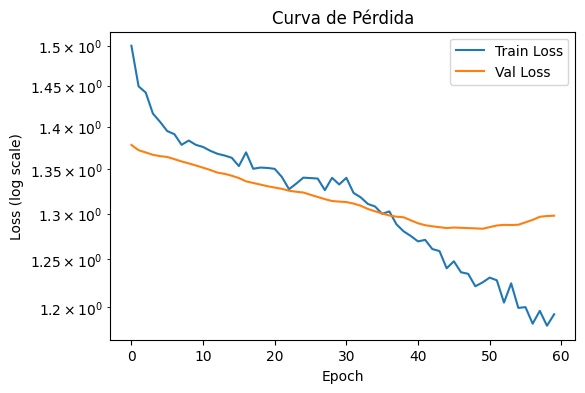

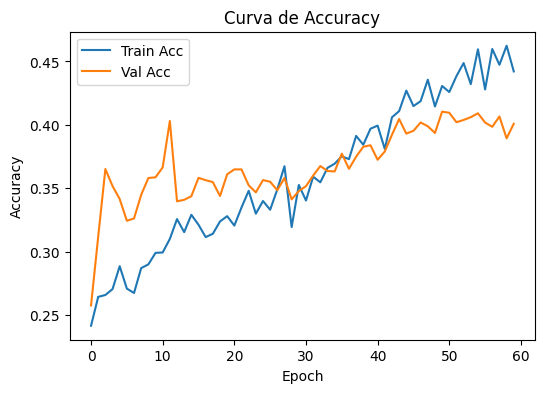

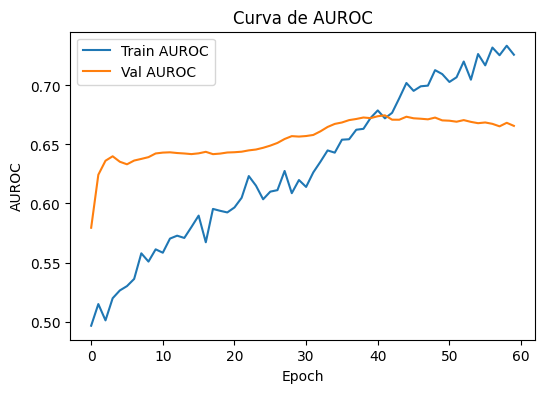

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asume que df_metrics ya está cargado
df = df_metrics

# 1) Curva de pérdida
plt.figure(figsize=(6,4))
sns.lineplot(data=df, x="epoch", y="train_loss_epoch", label="Train Loss")
sns.lineplot(data=df, x="epoch", y="val_loss",         label="Val Loss")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Loss (log scale)")
plt.title("Curva de Pérdida")
plt.legend()
plt.show()

# 2) Curva de accuracy
plt.figure(figsize=(6,4))
sns.lineplot(data=df, x="epoch", y="train_acc_epoch", label="Train Acc")
sns.lineplot(data=df, x="epoch", y="val_acc",         label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Curva de Accuracy")
plt.legend()
plt.show()

# 3) Curva de AUROC
plt.figure(figsize=(6,4))
sns.lineplot(data=df, x="epoch", y="train_auroc_epoch", label="Train AUROC")
sns.lineplot(data=df, x="epoch", y="val_auroc",         label="Val AUROC")
plt.xlabel("Epoch")
plt.ylabel("AUROC")
plt.title("Curva de AUROC")
plt.legend()
plt.show()


In [81]:
import numpy as np
import torch
from sklearn.metrics import accuracy_score

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for (x_txt, x_aud), y in test_dl:
        logits = model((x_txt, x_aud))
        preds  = torch.argmax(logits, dim=1)
        y_true.append(y.cpu().numpy())
        y_pred.append(preds.cpu().numpy())

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Accuracy global
global_acc = accuracy_score(y_true, y_pred)
print(f"Global Test Accuracy: {global_acc:.4f}")

Global Test Accuracy: 0.3859
